In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-data/Book1.xlsx


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load data from Excel
file_path = "/kaggle/input/new-data/Book1.xlsx"  # Change to your actual file path
df = pd.read_excel(file_path)

# Extract features and target
X = df[['x1', 'x2', 'x3', 'x4']].values
y = df['y'].values

In [3]:
print(df)

    x1  x2  x3  x4       y
0    2   1   2   2   67000
1    3   1   2   2   77000
2    4   1   2   2   87000
3    2   2   2   2   72000
4    2   2   2   1   71000
5    2   2   1   2   52000
6    4   2   1   2   72000
7    4   3   3   2  117000
8    4   3   1   2   77000
9    3   3   1   2   67000
10   3   2   1   2   62000
11   3   3   3   2  107000
12   3   3   1   2   67000
13   2   3   3   2   97000
14   3   1   1   2   57000
15   3   1   3   2   97000
16   3   1   2   2   77000
17   3   1   0   2   37000
18   3   1   1   2   57000
19   3   0   3   2   92000


In [4]:
print(X)

[[2 1 2 2]
 [3 1 2 2]
 [4 1 2 2]
 [2 2 2 2]
 [2 2 2 1]
 [2 2 1 2]
 [4 2 1 2]
 [4 3 3 2]
 [4 3 1 2]
 [3 3 1 2]
 [3 2 1 2]
 [3 3 3 2]
 [3 3 1 2]
 [2 3 3 2]
 [3 1 1 2]
 [3 1 3 2]
 [3 1 2 2]
 [3 1 0 2]
 [3 1 1 2]
 [3 0 3 2]]


# Train a linear regression model

In [5]:
model = LinearRegression()
model.fit(X, y)
print(model.fit(X, y))

LinearRegression()


In [6]:
y_pred = model.predict(X)
print(y_pred)
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"Model Accuracy (R² Score): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

[ 67000.  77000.  87000.  72000.  71000.  52000.  72000. 117000.  77000.
  67000.  62000. 107000.  67000.  97000.  57000.  97000.  77000.  37000.
  57000.  92000.]
Model Accuracy (R² Score): 1.0000
Mean Absolute Error (MAE): 0.0000
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000


# Function to predict y for new x1 and x2

In [7]:
def predict_y(x1, x2, x3, x4):
    new_data = np.array([[x1, x2, x3, x4]])
    prediction = model.predict(new_data)
    return prediction[0]

In [8]:
x1_new, x2_new, x3_new, x4_new = 5,1,1,1  # Change this to test with different values
predicted_y = predict_y(x1_new, x2_new, x3_new, x4_new)
print(f"Predicted y for x1={x1_new}, x2={x2_new}, x3={x3_new}, x4={x4_new}: {predicted_y}")

Predicted y for x1=5, x2=1, x3=1, x4=1: 75999.99999999999


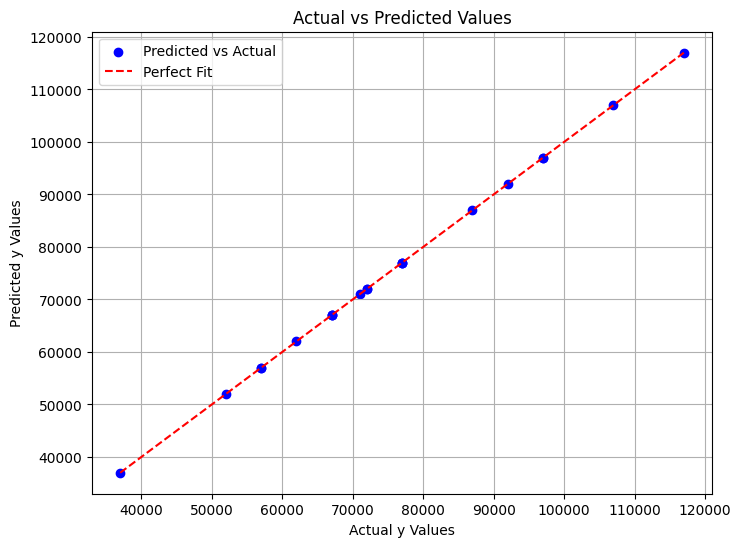

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='dashed', label='Perfect Fit')
plt.xlabel("Actual y Values")
plt.ylabel("Predicted y Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid()
plt.show()